In [1]:
# Import some modules which we will use later

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
# Define custom function

def euclidean_dist(x,y):
    """Calculates Euclidean distance between 2 n-dimensional vectors"""
    temp = x-y
    temp_2 = temp**2
    temp_sum = sum(temp_2)
    temp_sqrt = math.sqrt(temp_sum)
    
    return temp_sqrt


def adjacency_matrix(X):
    """Calculates distance matrix of input data points"""
    n = X.shape[0]
    dist_matrix = np.zeros((n, n))
    for i in range(0,n):
        for j in range(i+1,n):
            dist_matrix[i,j]=euclidean_dist(np.array(X.iloc[i,]),np.array(X.iloc[j,]))
            
    return dist_matrix


def benchmark_data_generation(n,p,K):
    """Generates benchmak data for clustering"""

    from sklearn.datasets.samples_generator import make_blobs
    X, y = make_blobs(n_samples=n, centers=K, n_features = p,
                  random_state=0, cluster_std=1.5)
    
    return X, y

def edge_vector(dist_matrix):
    """Creates list of edges/vertices with the corresponding distance"""
    n=len(dist_matrix)
    n_rows = int(n*(n-1)*(0.5))
    edge_dist = np.zeros((n_rows, 3))
    
    counter = 0
    
    for i in range(0,n):
        for j in range(i+1,n):
            
            edge_dist[counter,0] = i
            edge_dist[counter,1] = j
            edge_dist[counter,2] = dist_matrix[i,j]
            counter += 1
            
    return edge_dist

def edge_sorting(edge_vector):
    """Sorts the list of edges/distances"""
    sorted_matrix = edge_vector[edge_vector[:, -1].argsort()]
    
    return sorted_matrix


def k_means_clustering(K,X):
    n = X.shape[0] # Number of observations
    d = X.shape[1] # dimensions
    X = np.array(X) # Convert pandas dataframe to numpy array

    # STEP 0
    # Get initial starting points
    initial_indices = np.random.randint(0,high=n,size=K) # Initial indices
    print(initial_indices)

    centroids = np.zeros((K, d))

    counter = 0
    for i in initial_indices:
        centroids[counter,:] = X[i,:]
        counter += 1

    #print(centroids)

    # STEP 1
    # Assign points to centroids
    cluster_table = np.zeros((n, 2))
    cluster_table[:,0] = np.arange(0,n,1)
    cluster_table = cluster_table.astype(int)
    
    
    change_tracker = True
    
    # Big loop
    while change_tracker:
        overall_change = 0
        for i in range(0,n):
            current_cluster = int(cluster_table[i,1])
            #print(current_cluster)
            current_dist = euclidean_dist(X[i,],centroids[current_cluster,])
            for j in range(0,K):
                temp = euclidean_dist(X[i,],centroids[j,])
                if temp<current_dist:
                    cluster_table[i,1]=j
                    current_dist = temp

                    overall_change += 1

        if overall_change == 0:
            change_tracker = False

        # STEP 2
        # Recalculate centroids
        #print(cluster_table)

        # Filter observations
        temp_table = cluster_table[cluster_table[:,1]==0]
        #print(temp_table)

        for i in range(0,K):
            # Filter for points in the given cluster
            temp_table2 = cluster_table[cluster_table[:,1]==i]

            # Calculating new centroids
            temp_array = np.zeros((len(temp_table2),d))
            counter = 0

            for j in temp_table2[:,0]:
                temp_array[counter,:] = X[j,:]
                counter += 1

            # Assign the new centroids
            centroids[i,:] = np.mean(temp_array, axis=0)
            
    return centroids, cluster_table
    

In [3]:
# Test the custom function

x = np.array([1,2,3])
y = np.array([1,1,1])

print(euclidean_dist(x,y))

2.23606797749979


100
0.006729006703392466
      point_1  point_2  distance
3894     53.0     79.0  0.006729


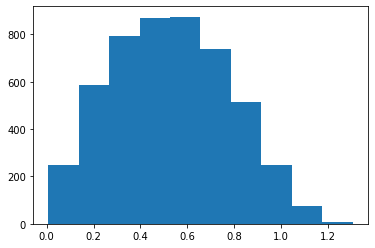

      index  point_1  point_2  distance
0      3770     50.0     96.0  1.305231
1      3743     50.0     69.0  1.265085
2       386      3.0     96.0  1.240727
3      2245     25.0     96.0  1.218423
4       359      3.0     69.0  1.205245
...     ...      ...      ...       ...
4945   1233     13.0     38.0  0.021243
4946   4047     57.0     58.0  0.018763
4947   1094     11.0     72.0  0.015639
4948   3586     47.0     62.0  0.015289
4949   3894     53.0     79.0  0.006729

[4950 rows x 4 columns]


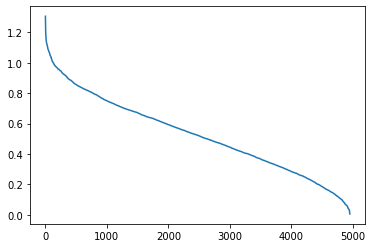

In [4]:
# Quick and dirty check for finding the 2 closest points

points = np.random.rand(100,2)

print(len(points))
#print(points)

results = np.random.rand(1,3)

for i in range(0,len(points)):
    for j in range(i+1,len(points)):
        dist = np.linalg.norm(points[i,:]-points[j,:])
        temp = np.array([i,j,dist]).reshape(1,3)
        #print(temp.shape)
        #print(results.shape)
        results = np.vstack((results,temp))

results = results[1:,:]        
#print(results)
print(min(results[:,2]))
a = min(results[:,2])


results = pd.DataFrame(results)
results.columns = ['point_1','point_2','distance']
#print(results.columns)

# Get the closest point
print(results[results['distance']<=a])


# Plot histogram of distance
plt.hist(results['distance'])
plt.show()

# Distance-sorted array
sorted_results = results.sort_values(by=['distance'],ascending=False).reset_index()
print(sorted_results)
plt.plot(sorted_results['distance'])
plt.show()

In [65]:
# Benchmark data generation
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=60, centers=5,n_features = 2,
                  random_state=0, cluster_std=0.2)

In [66]:
X = pd.DataFrame(X)
print(X.shape[0])

60


In [67]:
dist_matrix = np.zeros((len(y), len(y)))

In [68]:
for i in range(0,len(y)):
    for j in range(i+1,len(y)):
        dist_matrix[i,j]=euclidean_dist(np.array(X.iloc[i,]),np.array(X.iloc[j,]))

In [69]:
print(dist_matrix)

[[ 0.          0.32836797 14.35833286 ...  4.20854786  4.17960279
   5.30726092]
 [ 0.          0.         14.36333435 ...  4.30605762  4.25097055
   5.55465888]
 [ 0.          0.          0.         ... 10.34893277 10.2705343
  11.46289776]
 ...
 [ 0.          0.          0.         ...  0.          0.3515184
   2.87017855]
 [ 0.          0.          0.         ...  0.          0.
   3.22153427]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [70]:
temp = adjacency_matrix(X)
print(len(temp))

60


In [71]:
X1, y1 = benchmark_data_generation(n=60,p=4,K=3)


In [72]:
temp_vector = edge_vector(temp)
print(len(temp_vector))
print(temp_vector[21,:])

1770
[ 0.         22.          4.24637891]


In [73]:
sorted_list = edge_sorting(temp_vector)
print(len(sorted_list))

1770


In [74]:
# Parameters
K = 5 # Number of clusters
n = X.shape[0] # Number of observations
d = X.shape[1] # dimensions
X = np.array(X) # Convert pandas dataframe to numpy array

# STEP 0
# Get initial starting points
initial_indices = np.random.randint(0,high=n,size=K) # Initial indices
print(initial_indices)

centroids = np.zeros((K, d))

counter = 0
for i in initial_indices:
    centroids[counter,:] = X[i,:]
    counter += 1

print(centroids)

# STEP 1
# Assign points to centroids
cluster_table = np.zeros((n, 2))
cluster_table[:,0] = np.arange(0,n,1)
cluster_table = cluster_table.astype(int)

change_tracker = True
overall_change = 0
for i in range(0,n):
    current_cluster = int(cluster_table[i,1])
    #print(current_cluster)
    current_dist = euclidean_dist(X[i,],centroids[current_cluster,])
    for j in range(0,K):
        temp = euclidean_dist(X[i,],centroids[j,])
        if temp<current_dist:
            cluster_table[i,1]=j
            current_dist = temp
            
            overall_change += 1
            
if overall_change == 0:
    change_tracker = False

# STEP 2
# Recalculate centroids
print(cluster_table)

# Filter observations
temp_table = cluster_table[cluster_table[:,1]==0]
print(temp_table)

for i in range(0,K):
    # Filter for points in the given cluster
    temp_table2 = cluster_table[cluster_table[:,1]==i]
    
    # Calculating new centroids
    temp_array = np.zeros((len(temp_table2),d))
    counter = 0
    
    for j in temp_table2[:,0]:
        temp_array[counter,:] = X[j,:]
        counter += 1
    
    # Assign the new centroids
    centroids[i,:] = np.mean(temp_array, axis=0)
    

print(centroids)
print(overall_change)

[37 19  9 50 24]
[[ 0.98542178  4.26635056]
 [ 1.98568509  0.92893345]
 [-1.68953327  2.57262574]
 [-1.22287336  7.91585789]
 [ 9.646767   -2.14996069]]
[[ 0  3]
 [ 1  3]
 [ 2  4]
 [ 3  1]
 [ 4  2]
 [ 5  0]
 [ 6  3]
 [ 7  3]
 [ 8  4]
 [ 9  2]
 [10  0]
 [11  3]
 [12  1]
 [13  4]
 [14  1]
 [15  3]
 [16  1]
 [17  1]
 [18  1]
 [19  1]
 [20  4]
 [21  4]
 [22  0]
 [23  1]
 [24  4]
 [25  2]
 [26  3]
 [27  2]
 [28  1]
 [29  2]
 [30  2]
 [31  4]
 [32  0]
 [33  2]
 [34  4]
 [35  1]
 [36  0]
 [37  0]
 [38  1]
 [39  4]
 [40  4]
 [41  0]
 [42  0]
 [43  3]
 [44  3]
 [45  0]
 [46  4]
 [47  2]
 [48  4]
 [49  2]
 [50  3]
 [51  2]
 [52  1]
 [53  3]
 [54  0]
 [55  3]
 [56  2]
 [57  0]
 [58  0]
 [59  2]]
[[ 5  0]
 [10  0]
 [22  0]
 [32  0]
 [36  0]
 [37  0]
 [41  0]
 [42  0]
 [45  0]
 [54  0]
 [57  0]
 [58  0]]
[[ 1.05265327  4.28690396]
 [ 1.9385333   0.92517922]
 [-1.60284845  2.85541324]
 [-1.21824977  7.96700915]
 [ 9.3403589  -2.20695465]]
60


In [75]:
def k_means_clustering(K,X):
    n = X.shape[0] # Number of observations
    d = X.shape[1] # dimensions
    X = np.array(X) # Convert pandas dataframe to numpy array

    # STEP 0
    # Get initial starting points
    initial_indices = np.random.randint(0,high=n,size=K) # Initial indices
    print(initial_indices)

    centroids = np.zeros((K, d))

    counter = 0
    for i in initial_indices:
        centroids[counter,:] = X[i,:]
        counter += 1

    #print(centroids)

    # STEP 1
    # Assign points to centroids
    cluster_table = np.zeros((n, 2))
    cluster_table[:,0] = np.arange(0,n,1)
    cluster_table = cluster_table.astype(int)
    
    
    change_tracker = True
    
    # Big loop
    while change_tracker:
        overall_change = 0
        for i in range(0,n):
            current_cluster = int(cluster_table[i,1])
            #print(current_cluster)
            current_dist = euclidean_dist(X[i,],centroids[current_cluster,])
            for j in range(0,K):
                temp = euclidean_dist(X[i,],centroids[j,])
                if temp<current_dist:
                    cluster_table[i,1]=j
                    current_dist = temp

                    overall_change += 1

        if overall_change == 0:
            change_tracker = False

        # STEP 2
        # Recalculate centroids
        #print(cluster_table)

        # Filter observations
        temp_table = cluster_table[cluster_table[:,1]==0]
        #print(temp_table)

        for i in range(0,K):
            # Filter for points in the given cluster
            temp_table2 = cluster_table[cluster_table[:,1]==i]

            # Calculating new centroids
            temp_array = np.zeros((len(temp_table2),d))
            counter = 0

            for j in temp_table2[:,0]:
                temp_array[counter,:] = X[j,:]
                counter += 1

            # Assign the new centroids
            centroids[i,:] = np.mean(temp_array, axis=0)
            
    return centroids, cluster_table
    

In [80]:
centroids, cluster_table = k_means_clustering(6,X)
print(centroids)
print(cluster_table)

[ 4  6 28  1 16  0]
[[-0.27509759  3.5711586 ]
 [-1.32864289  8.06198468]
 [ 1.9385333   0.92517922]
 [-0.95060534  8.21463785]
 [ 9.3403589  -2.20695465]
 [-1.01308293  7.63119818]]
[[ 0  1]
 [ 1  3]
 [ 2  4]
 [ 3  2]
 [ 4  0]
 [ 5  0]
 [ 6  1]
 [ 7  1]
 [ 8  4]
 [ 9  0]
 [10  0]
 [11  5]
 [12  2]
 [13  4]
 [14  2]
 [15  1]
 [16  2]
 [17  2]
 [18  2]
 [19  2]
 [20  4]
 [21  4]
 [22  0]
 [23  2]
 [24  4]
 [25  0]
 [26  1]
 [27  0]
 [28  2]
 [29  0]
 [30  0]
 [31  4]
 [32  0]
 [33  0]
 [34  4]
 [35  2]
 [36  0]
 [37  0]
 [38  2]
 [39  4]
 [40  4]
 [41  0]
 [42  0]
 [43  5]
 [44  1]
 [45  0]
 [46  4]
 [47  0]
 [48  4]
 [49  0]
 [50  1]
 [51  0]
 [52  2]
 [53  1]
 [54  0]
 [55  5]
 [56  0]
 [57  0]
 [58  0]
 [59  0]]


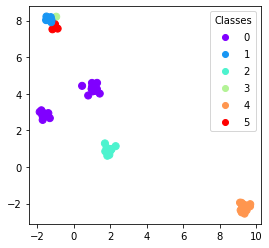

In [81]:
# Scatter plot
fig,ax = plt.subplots()
plt.axes().set_aspect('equal')
scatter=plt.scatter(X[:, 0], X[:, 1], c=cluster_table[:,1], s=50 , cmap='rainbow');
# produce a legend with the unique colors from the scatter
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
plt.show()